Pyber- The Power of Plots

In [1]:
%matplotlib inline

# import all dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# load in csv files with raw data
cityCSV = os.path.join('data', 'city_data.csv')
rideCSV = os.path.join('data', 'ride_data.csv')

cityData = pd.read_csv(cityCSV)
rideData = pd.read_csv(rideCSV)

#cityData.head()
#rideData.head()

# city data columns are 'city', 'driver_count', 'type'
# ride data columns are 'City', 'date', 'fare', 'ride_id'

In [2]:
# combine data frames on city and driver_count columns
combinedCityRide = pd.merge(rideData, cityData,
                            how='left', on='city')
combinedCityRide.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


Bubble Plot of Ride Sharing Data

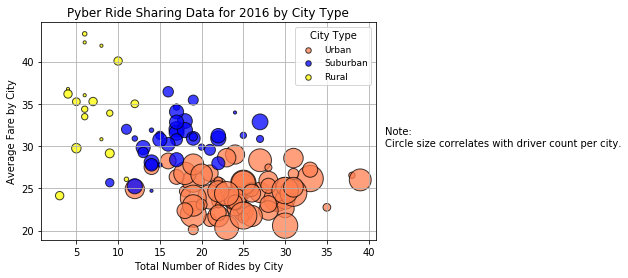

In [3]:
# set up new dataframes that are only the TYPE column values that you want, three new dataframes
# use the merged data frame to do this
urbanCity = combinedCityRide[combinedCityRide['type'] == 'Urban'].groupby([combinedCityRide['city']])
#urbanCity.head()
ruralCity = combinedCityRide[combinedCityRide['type'] == 'Rural'].groupby([combinedCityRide['city']])
suburbanCity = combinedCityRide[combinedCityRide['type'] == 'Suburban'].groupby([combinedCityRide['city']])
# Average Fare ($) Per City Type
urbanMeanFareY = urbanCity['fare'].mean()
#urbanMeanFare.head()
ruralMeanFareY = ruralCity['fare'].mean()
suburbanMeanFareY = suburbanCity['fare'].mean()

# City Type (Urban, Suburban, Rural)
# Total Number of Rides Per City
urbanTotalRidesX = urbanCity['ride_id'].count()
#print(urbanTotalRides)
ruralTotalRidesX = ruralCity['ride_id'].count()
suburbanTotalRidesX = suburbanCity['ride_id'].count()
#print(suburbanTotalRidesX)
# Total Number of Drivers Per City
urbanDrivers = urbanCity['driver_count'].mean()
#print(urbanDrivers)
ruralDrivers = ruralCity['driver_count'].mean()
suburbanDrivers = suburbanCity['driver_count'].mean()

# Build the scatter plots for each city types
plt.scatter(urbanTotalRidesX, urbanMeanFareY, label = 'Urban',
            s=urbanDrivers*10, color=['coral'], edgecolor='black', alpha=0.75, marker='o')
plt.scatter(suburbanTotalRidesX, suburbanMeanFareY, label = 'Suburban',
            s=suburbanDrivers*10, color=['blue'], edgecolor='black', alpha=0.75, marker='o')
plt.scatter(ruralTotalRidesX, ruralMeanFareY, label = 'Rural',
            s=ruralDrivers*10, color=['yellow'], edgecolor='black', alpha=0.75, marker='o')
plt.grid()
# Incorporate the other graph properties
plt.xlabel('Total Number of Rides by City')
plt.ylabel('Average Fare by City')
plt.title('Pyber Ride Sharing Data for 2016 by City Type')

# Create a legend
legend = plt.legend(fontsize = 9, title= "City Type", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,30,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig(os.path.join('Images', 'pyberBubblePlot.png'))

# display plot
plt.show()
#   * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.

Total Fares by City Type

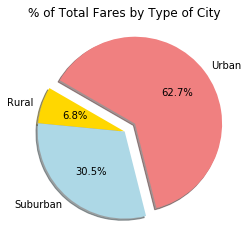

In [4]:
# group original dataframe by type of city
typeGroup = combinedCityRide.groupby('type')
# Calculate sum of fares
fareSum = typeGroup['fare'].sum()
# Build Pie Chart attributes to match starter
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.15)
colors = ['gold','lightblue', 'lightcoral']

# complete construction of pie chart
plt.pie(fareSum, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=150)
# title pie chart
plt.title('% of Total Fares by Type of City')

# Save Figure
plt.savefig(os.path.join('Images', 'totalFareByCityType.png'))

# show pie chart
plt.show()
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

Total Rides by City Type

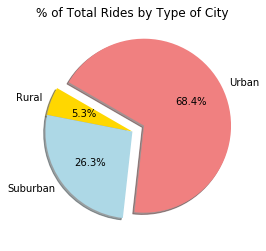

In [5]:
# Calculate sum of fares
rideCount = typeGroup['ride_id'].count()

# Build Pie Chart attributes to match starter
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.15)
colors = ['gold','lightblue', 'lightcoral']

# complete construction of pie chart
plt.pie(rideCount, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=150)
# title pie chart
plt.title('% of Total Rides by Type of City')

# Save Figure
plt.savefig(os.path.join('Images', 'totalRidesByCityType.png'))

# show pie chart
plt.show()
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

Total Drivers by City Type

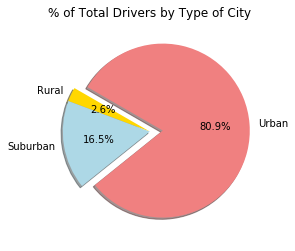

In [6]:
# Calculate sum of fares
driverGroup = cityData.groupby('type')
driverSum = driverGroup['driver_count'].sum()

# Build Pie Chart attributes to match starter
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.15)
colors = ['gold','lightblue', 'lightcoral']

# complete construction of pie chart
plt.pie(driverSum, explode=explode, labels=labels, colors=colors, 
        shadow=True, startangle=150, autopct='%1.1f%%')
# title pie chart
plt.title('% of Total Drivers by Type of City')

# Save Figure
plt.savefig(os.path.join('Images', 'totalDriversByCityType.png'))

# show pie chart
plt.show()

Three Key Takeaways

1. Most drivers are located in Urban areas, over 80% of all Pyber drivers.  Rural drivers make up the smallest number of drivers at 2.6% of the total drivers. 
2. Despite only representing 2.6% of the total driver populatation the total fares of the Rural drivers totals to almost 7% of the total amount of fares generated in all three city types.
3. Looking at the 'Pyber Ride Sharing Data for 2016 by City Type' bubble chart above you can see that the points above are clearly explained.  There are significantly more drivers in Urban areas, which translates to more total rides, but the average fare per ride is significantly lower than the rural areas.  The assumption to be made here is the rides will be shorter and more frequent because of the condensed atomophere of Urban areas.